In [91]:
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train/255.0
X_test = X_test/255.0

In [2]:
def display_images(images, ncols=5, figsize=(15, 6)):
    nrows = len(images) // ncols + (len(images) % ncols > 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()
 

In [70]:
def display_image_reconstructions(
    originals,
    reconstructions,
    ncols=10,
    figsize=(15, 6),
    image_shape=(28, 28),
    column_titles=None,
    cmap='gray', title='-',
):
	n = len(originals)
	if len(reconstructions) != n:
		raise ValueError("Le nombre d'images reconstruites doit correspondre aux originales")

	# Détermination du nombre effectif de colonnes
	ncols_eff = min(ncols, n)

	# Création de la grille (2 lignes : originales / reconstructions)
	fig, axes = plt.subplots(2, ncols_eff, figsize=figsize)
	axes = axes.reshape(2, ncols_eff)

	# Titre global de la figure
	fig.suptitle(title, fontsize=14, y=0.8)

	# Titres des lignes
	fig.text(0, 0.61, "Original images", va='center', ha='left', rotation='vertical', fontsize=12)
	fig.text(0.0, 0.3, "Reconstructions", va='center', ha='left', rotation='vertical', fontsize=12)

	# Affichage des images
	for j in range(ncols_eff):
		# Ligne 1 : Image originale
		ax_orig = axes[0, j]
		img_orig = np.array(originals[j]).reshape(image_shape)
		ax_orig.imshow(img_orig, cmap=cmap, interpolation='none')
		ax_orig.axis('off')

		# Ligne 2 : Image reconstruite
		ax_recon = axes[1, j]
		img_recon = np.array(reconstructions[j]).reshape(image_shape)
		ax_recon.imshow(img_recon, cmap=cmap, interpolation='none')
		ax_recon.axis('off')

	# Mise en page
	plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])  # Pour laisser de l'espace au titre global
	plt.show()

# Model 1

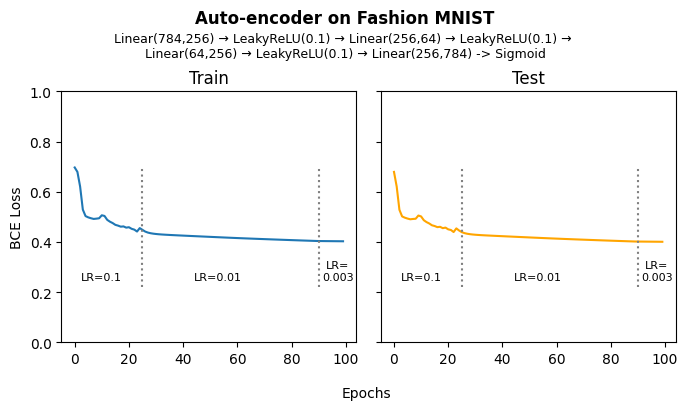

In [79]:
model_path = "models/model1.pkl"
losses_path = "models/loss1.csv"

df = pd.read_csv(losses_path)
train_losses = df["Train Loss"].values
test_losses = df["Test Loss"].values

fig, axs = plt.subplots(1, 2, figsize=(7, 4), sharex=True, sharey=True)

axs[0].plot(train_losses, label='Loss train')
axs[0].set_ylabel("BCE Loss", fontsize=10)
axs[0].set_ylim(0, 1)
axs[0].axvline(x=25, ymax=0.7, ymin=0.22, linestyle=':', color='grey')
axs[0].axvline(x=90, ymax=0.7, ymin=0.22, linestyle=':', color='grey')
axs[0].text(10, 0.25, "LR=0.1", fontsize=8, ha='center')
axs[0].text(53, 0.25, "LR=0.01", fontsize=8, ha='center')
axs[0].text(97, 0.25, "LR=\n0.003", fontsize=8, ha='center')
axs[0].grid(visible=True, which='minor', linestyle='--', color='gray')
axs[0].set_title("Train")

axs[1].plot(test_losses, label='Loss test', color='orange')
axs[1].axvline(x=25, ymax=0.7, ymin=0.22, linestyle=':', color='grey')
axs[1].axvline(x=90, ymax=0.7, ymin=0.22, linestyle=':', color='grey')
axs[1].text(10, 0.25, "LR=0.1", fontsize=8, ha='center')
axs[1].text(53, 0.25, "LR=0.01", fontsize=8, ha='center')
axs[1].text(97, 0.25, "LR=\n0.003", fontsize=8, ha='center')
axs[1].grid(visible=True, which='minor', linestyle='--', color='gray')
axs[1].set_title("Test")

fig.suptitle("Auto-encoder on Fashion MNIST", fontsize=12, fontweight='bold')
fig.text(0.5, 0.86,
         "Linear(784,256) → LeakyReLU(0.1) → Linear(256,64) → LeakyReLU(0.1) → \nLinear(64,256) → LeakyReLU(0.1) → Linear(256,784) -> Sigmoid",
         ha='center', fontsize=9)
fig.text(0.53, 0.01, "Epochs", ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.05,1, 0.95])
plt.show()


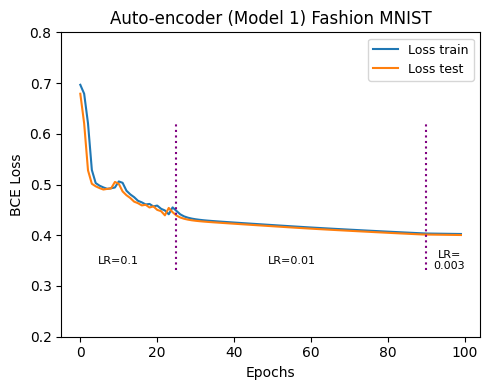

In [85]:
df = pd.read_csv("models/loss1.csv")
plt.figure(figsize=(5, 4))
# add grid lines
plt.plot(df["Train Loss"], label='Loss train')
plt.plot(df["Test Loss"], label='Loss test')
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("BCE Loss", fontsize=10)
plt.ylim(0.2, 0.8)
plt.axvline(x=25, ymax=0.7, ymin=0.22,linestyle=':', color='purple')
plt.axvline(x=90, linestyle=':', ymax=0.7, ymin=.22, color='purple')
plt.text(10, .35, "LR=0.1", fontsize=8, ha='center', va='center')
plt.text(55, .35 ,"LR=0.01", fontsize=8, ha='center', va='center')
plt.text(96, .35, "LR=\n0.003", fontsize=8, ha='center', va='center')
plt.grid(visible=True, which='minor', color='gray', linestyle='--')
plt.title("Auto-encoder (Model 1) Fashion MNIST")
#plt.text(20, .96, "Leaky ReLU ($\\alpha$=0.01)\nEncodor: L(784,256) -> LReLu -> L(256,64) -> Tanh \nDecodor:  L(64,256) -> LRelu -> L(256,784) -> Sigmoid", fontsize=8, va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

0.40048078103184226

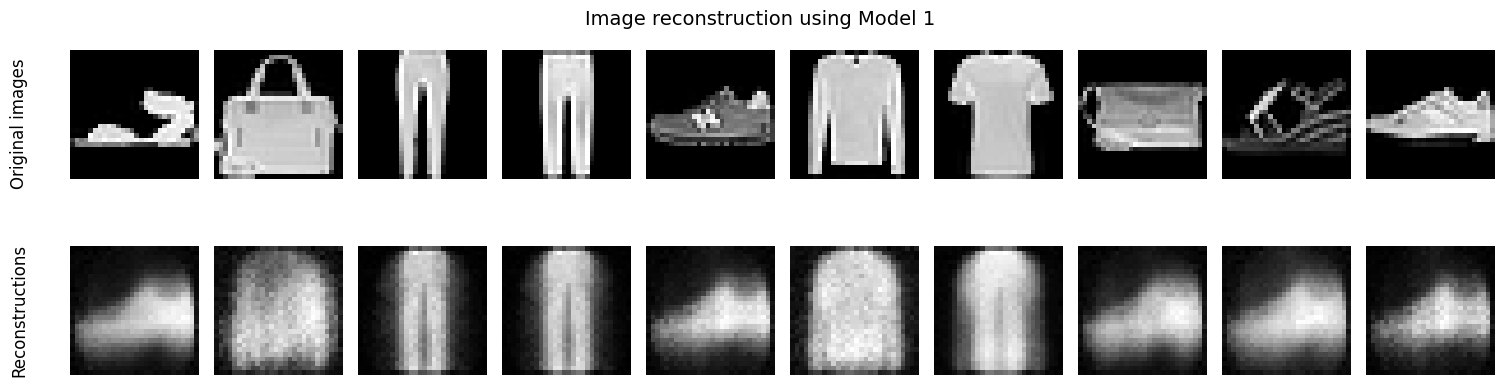

In [88]:
# load the model in 
with open("models/model1.pkl", "rb") as f:
	optim = pickle.load(f)

loss, pred = optim.test(X_test, X_test)
display(loss)
indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[indices]
selected_predictions = pred[indices]
display_image_reconstructions(
	selected_images,
	selected_predictions,
	ncols=10,
	figsize=(15, 6),
	image_shape=(28, 28),
	cmap='gray', title="Image reconstruction using Model 1")

# Model 2

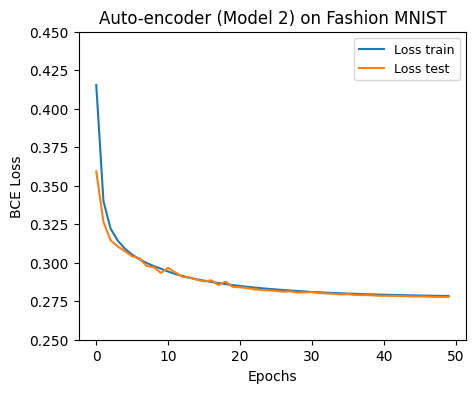

In [77]:
df = pd.read_csv("models/loss2.csv")
plt.figure(figsize=(5, 4))
plt.plot(df["Train Loss"], label='Loss train')
plt.plot(df["Test Loss"], label='Loss test')
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("BCE Loss", fontsize=10)
plt.ylim(0.25, 0.45)
plt.title("Auto-encoder (Model 2) on Fashion MNIST")
plt.legend(loc='upper right', fontsize=9)
plt.grid(visible=True, which='minor', color='grey')
plt.show()

0.27775181375613844

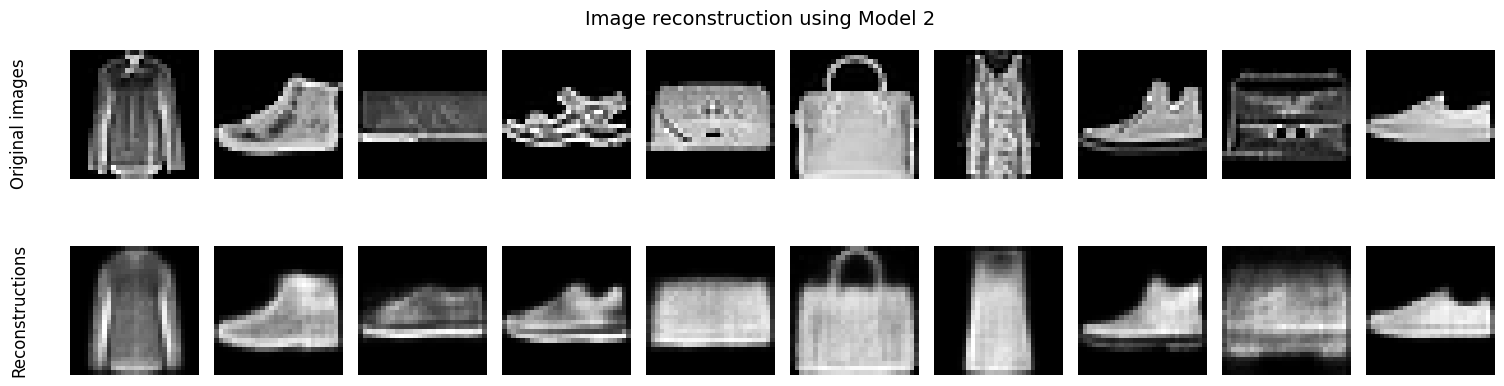

In [78]:
# load the model in 
with open("models/model2.pkl", "rb") as f:
	optim = pickle.load(f)
 
loss, pred = optim.test(X_test, X_test)
display(loss)
indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[indices]
selected_predictions = pred[indices]
display_image_reconstructions(
	selected_images,
	selected_predictions,
	ncols=10,
	figsize=(15, 6),
	image_shape=(28, 28),
	cmap='gray', title="Image reconstruction using Model 2")

# Model 3

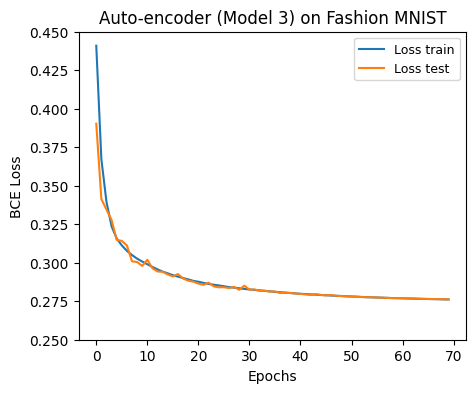

In [89]:
df = pd.read_csv("models/loss3.csv")
plt.figure(figsize=(5, 4))
plt.plot(df["Train Loss"], label='Loss train')
plt.plot(df["Test Loss"], label='Loss test')
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("BCE Loss", fontsize=10)
plt.ylim(0.25, 0.45)
plt.title("Auto-encoder (Model 3) on Fashion MNIST")
plt.legend(loc='upper right', fontsize=9)
plt.grid(visible=True, which='minor', color='grey')
plt.show()

0.2762616669389235

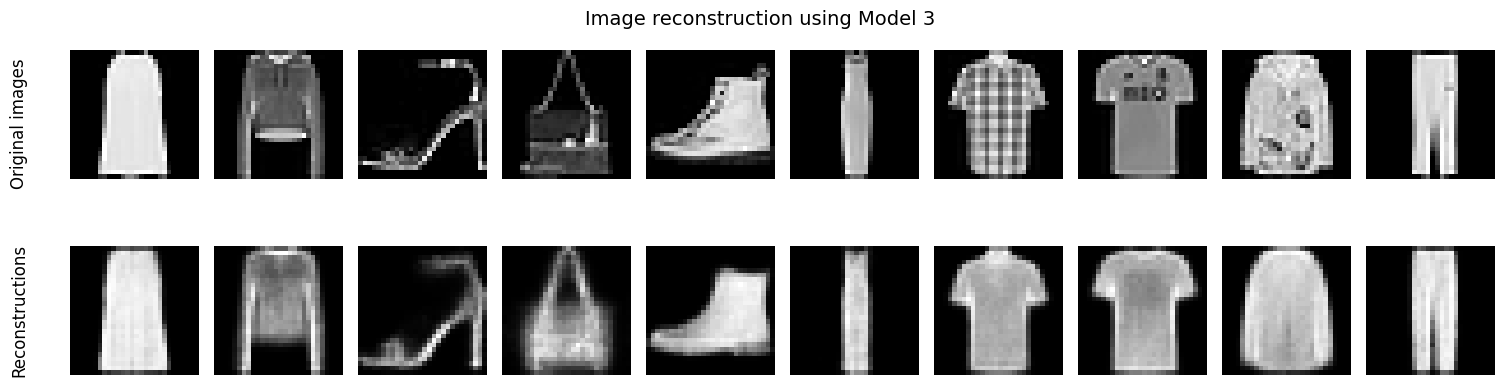

In [90]:
# load the model in 
with open("models/model3.pkl", "rb") as f:
	optim = pickle.load(f)
 
loss, pred = optim.test(X_test, X_test)
display(loss)
indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[indices]
selected_predictions = pred[indices]
display_image_reconstructions(
	selected_images,
	selected_predictions,
	ncols=10,
	figsize=(15, 6),
	image_shape=(28, 28),
	cmap='gray', title="Image reconstruction using Model 3")

# Model 4

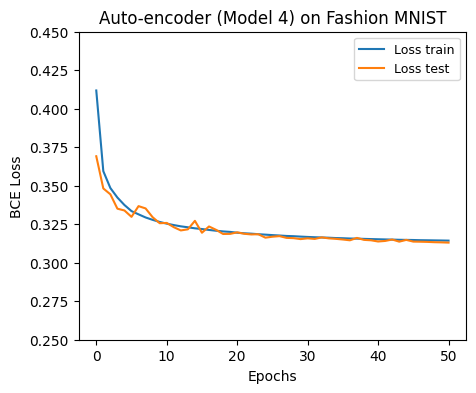

In [92]:
df = pd.read_csv("models/loss4.csv")
plt.figure(figsize=(5, 4))
plt.plot(df["Train Loss"], label='Loss train')
plt.plot(df["Test Loss"], label='Loss test')
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("BCE Loss", fontsize=10)
plt.ylim(0.25, 0.45)
plt.title("Auto-encoder (Model 4) on Fashion MNIST")
plt.legend(loc='upper right', fontsize=9)
plt.grid(visible=True, which='minor', color='grey')
plt.show()


0.3130292769226505

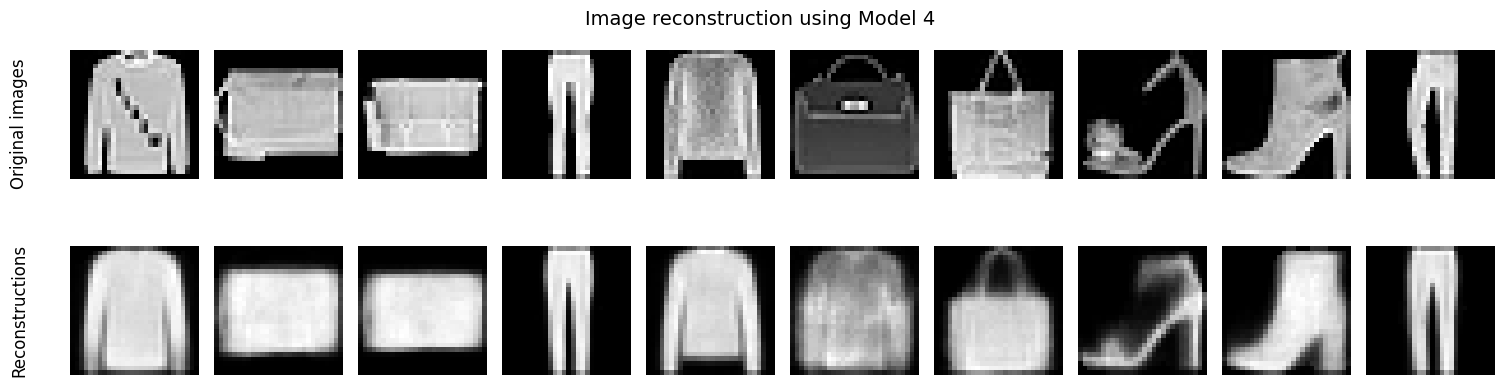

In [95]:
# load the model in 
with open("models/model4.pkl", "rb") as f:
	optim = pickle.load(f)
 
loss, pred = optim.test(X_test, X_test)
display(loss)
indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[indices]
selected_predictions = pred[indices]
display_image_reconstructions(
	selected_images,
	selected_predictions,
	ncols=10,
	figsize=(15, 6),
	image_shape=(28, 28),
	cmap='gray', title="Image reconstruction using Model 4")